In [1]:
import numpy as np

In [2]:
fish_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
fish_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
# Train과 Test 분리
from sklearn.model_selection import train_test_split

In [4]:
train_input,test_input,train_target,test_target = train_test_split(
    fish_length,fish_weight,random_state=42
)

In [6]:
train_input = train_input.reshape(-1,1)
test_input = test_input.reshape(-1,1)

In [7]:
from sklearn.neighbors import KNeighborsRegressor

In [8]:
knr = KNeighborsRegressor(n_neighbors=3)
knr.fit(train_input,train_target)

KNeighborsRegressor(n_neighbors=3)

---
### 길이가 50cm인 생선의 무게를 예측

In [9]:
knr.predict([[50]])

array([1033.33333333])

### 기존 데이터로 무게 확인



In [10]:
train_target.max()

1100.0

In [11]:
train_input.max()

44.0

### 산점도로 이웃을 구해서 확인해보자


In [12]:
import matplotlib.pyplot as plt

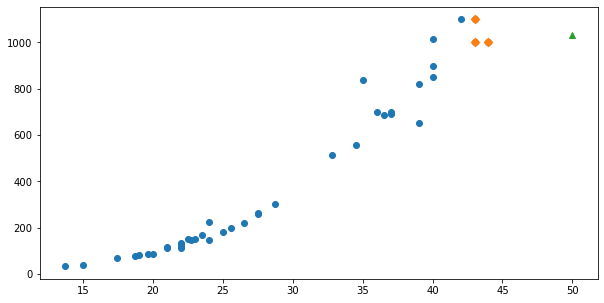

In [19]:
# 50cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

# 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 50cm 생선
plt.scatter(50,1033,marker='^')
plt.show()

# knr 예측불가 이웃 데이터와도 많이 떨어져 있으므로...

In [20]:
# ???
knr.predict([[100]])

array([1033.33333333])

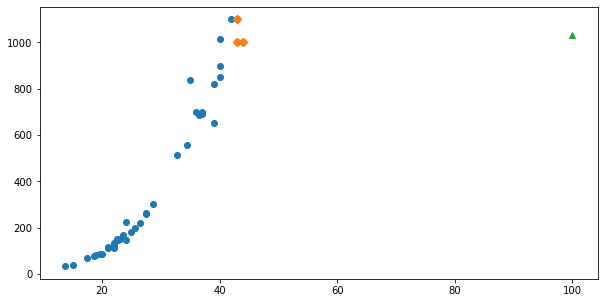

In [21]:
# 100cm 이웃을 구합니다.
distance, indexes = knr.kneighbors([[50]])

# 훈련 세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)

# 이웃 샘플만 다시 그립니다
plt.scatter(train_input[indexes],train_target[indexes],marker='D')

# 100cm 생선
plt.scatter(100,1033,marker='^')
plt.show()

# knr 예측불가 이웃 데이터와도 많이 떨어져 있으므로...

---
### 선형회귀(Linear Regression)
: 직선이나 곡선의 함수식(Y=aX + b)을 이용하여 구하는 방식으로 로지스틱 회귀분석이나 인공신경망의 기초가 되었다.

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [24]:
lr.fit(train_input,train_target)

LinearRegression()

In [25]:
lr.predict([[50]])

array([1241.83860323])

In [26]:
# Y = aX + b에서 기울기와 절편을 출력해보자(Deep Learning에서는 Weight와 Bias로 불림)
print(lr.coef_,lr.intercept_)

[39.01714496] -709.0186449535477


> lr.coef_가 리스트로 출력된 이유는 다항식으로 변환하면 x의 값이 여러개이기 때문이다

In [28]:
39.01714496 * 50 -709.0186449535477

1241.8386030464526

### 산점도 그려보기

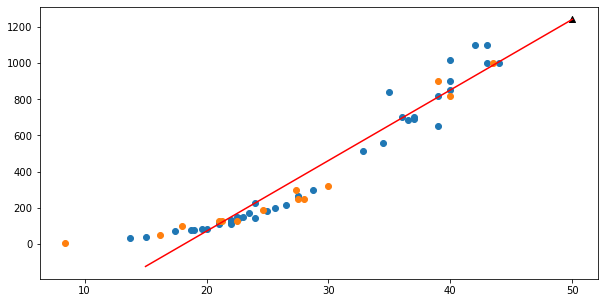

In [37]:
# 훈련세트의 산점도를 그립니다.
plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)

# 15에서 50까지 1차 방정식 그래프를 그립니다.
plt.plot(
    [15,50],
    [15 * lr.coef_ + lr.intercept_,50*lr.coef_ + lr.intercept_],c='red'
)

# 50cm 생선 데이터
plt.scatter(50,1241.8,marker='^',c='black')

plt.show()

> 산점도의 회귀선을 보니 길이가 작아지면 무게가 음수가 발생할 수 있다.       
> 절편이 음수이다.          


In [36]:
print(lr.score(train_input,train_target))
print(lr.score(test_input,test_target))

0.939846333997604
0.8247503123313558


> 과대 적합이 발생

---
### 다항 회귀
Y = $aX^2$ + bX +c
- 항이 여러개 있고 Feature가 하나인 것을 의미
- Feature가 여러개인 회귀는 다중회귀라고 한다.

In [40]:
# Feature를 제곱한 Column을 생성하여 기존의 Column에 붙인다.

train_poly = np.column_stack((train_input**2,train_input))
test_poly = np.column_stack((test_input**2,test_input))

In [41]:
print(train_poly.shape,test_poly.shape)

(42, 2) (14, 2)


In [42]:
lr = LinearRegression()

In [43]:
lr.fit(train_poly,train_target)

LinearRegression()

In [44]:
# 50cm 생선에 대한 예측 (단항 회귀 => 1241.8)
lr.predict([[50**2,50]]) # 항이 두개인 것으로 공부했으니 제곱한 것도 넣어줘야 함

array([1573.98423528])

In [45]:
# 기울기와 절편
print(lr.coef_,lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278259


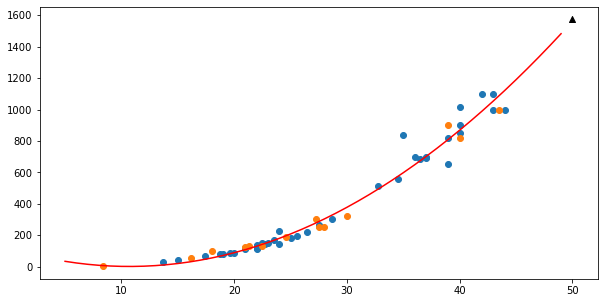

In [50]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만듭니다.
point = np.arange(5,50)

# 훈련 세트의 산점도 그리기

plt.figure(figsize=(10,5))
plt.scatter(train_input,train_target)
plt.scatter(test_input,test_target)

# 15에서 50까지 2차 방정식 그래프를 그립니다.
plt.plot(
    point,
    1.01 *point **2 -21.6*point + 116.05,
    color='red'
)

# 50cm 생선 데이터
plt.scatter(50,1574,marker='^',c='black')

plt.show()

In [51]:
# 과대적합과 과소적합
print(lr.score(train_poly,train_target))
print(lr.score(test_poly,test_target))

0.9706807451768623
0.9775935108325121


In [ ]:
> 약간의 과소적합이 발생하지만 단순회귀보다는 다항회귀가 진전이 있었다.